In [1]:
import sys
import matplotlib.pyplot as plt
from collections import namedtuple
import math

Point = namedtuple('Point', 'x y')

with open('input.txt') as f:
    paths = f.read().strip().split('\n')
    rocks = []
    
    min_x = sys.maxsize
    min_y = sys.maxsize
    max_x = 0
    max_y = 0
    
    for path in paths:
        parts = path.split(' -> ')
        coords = []
        for p in parts:
            x, y = map(int, p.split(','))
            coords.append(Point(x, y))
            if x > max_x:
                max_x = x
            if y > max_y: 
                max_y = y
                
            if x < min_x:
                min_x = x
            if y < min_y: 
                min_y = y
        rocks.append(coords)


sand = Point(500, 0)
        
width = max_x - min_x + 1
height = max_y + 1
        
# part2
part2 = True
if part2:
    # make a triangle to estimate the needed space for a triangle
    # between the top and the floor.
    # we know a, α, γ and β
    #
    #           C
    #          +
    #        /γ|
    #    b /   |
    #    /     | a
    #  /α     β|
    # +--------+
    # A   c    B
    #
    # c = alpha/sin(alpha) * sin(gamma)
    max_y += 2
    a =  max_y
    c = int(a / math.sin(45) * math.sin(45))

    min_x = sand.x - c
    max_x = sand.x + c
    width = max_x - min_x + 1
    height = max_y + 1
    
    rocks.append([Point(min_x, max_y), Point(max_x, max_y)])
    

print(max_x, max_y)
print(min_x, min_y)
print(width, 'x', height)

field = []
for i in range(height):
    field.append(['.']*width)

def ARR_X(x):
    return x - min_x

# Sand spot
field[sand.y][ARR_X(sand.x)] = '+'

# draw rocks
for rock in rocks:
    p1 = rock.pop(0)
    while (rock):
        p2 = rock.pop(0)        
        
        if (p1.x == p2.x):
            y1 = min(p1.y, p2.y)
            for y in range(y1, max(p1.y, p2.y)+1):
                field[y][ARR_X(p1.x)] = '#'
        elif (p1.y == p2.y):
            x1 = min(p1.x, p2.x)
            for x in range(x1, max(p1.x, p2.x)+1):
                field[p1.y][ARR_X(x)] = '#'
        p1 = p2

671 171
329 13
343 x 172


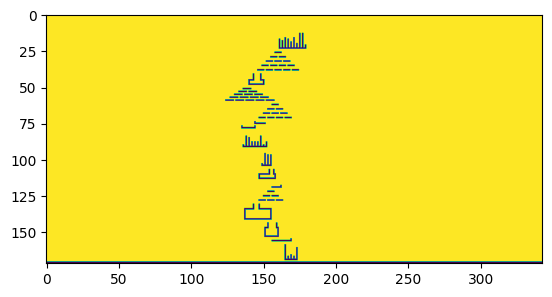

In [2]:
field2 = []
for i in range(height):
    field2.append([False]*width)


for y in range(height):
    for x in range(width):
        field2[y][x] = ord(field[y][x])

plt.imshow(field2)
plt.show(field2)

In [3]:
grains = 0
while True: # pouring sand
    
    # new sand grain
    try:
        x = sand.x
        y = sand.y
        last_grain_count = grains

        while True: # stepping
            y +=1

            if field[y][ARR_X(x)] == '.':
                continue

            # going further down is blocked, try left
            if field[y][ARR_X(x)-1] == '.':
                x -=1
                continue

            # left is blocked, try righgt
            if field[y][ARR_X(x)+1] == '.':
                x +=1
                continue
                

            # If we reach the top, break. Needed for pt2
            if field[y-1][ARR_X(x)] == '+':
                grains += 1
                raise IndexError()
                
            # no more move possible
            field[y-1][ARR_X(x)] = 'o'
            grains += 1
            break
    except IndexError:
        # falling in to abyss
        break

print(grains)

27623


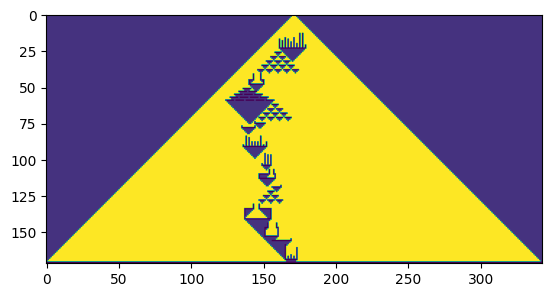

In [4]:
for y in range(height):
    for x in range(width):
        field2[y][x] = ord(field[y][x])
plt.imshow(field2)
plt.show()